<a href="https://colab.research.google.com/github/JaohBlack/Analytics/blob/main/Customer%20Satisfaction%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dataset.
import pandas as pd
train = pd.read_csv("train.csv")
#deleted rows with blank values
train.isna().sum()
train = train.dropna()

test = pd.read_csv("test.csv")
#deleted rows with blank values
test.isna().sum()
test = test.dropna()

In [ ]:
# combined data: incase we need it for some analysis
# Adding a new column named Dataset, which shows the origin of the data
train['Dataset'] = 'Train'
test['Dataset'] = 'Test'

# Combine the datasets
combined_data = pd.concat([train, test], axis=0, ignore_index=True)

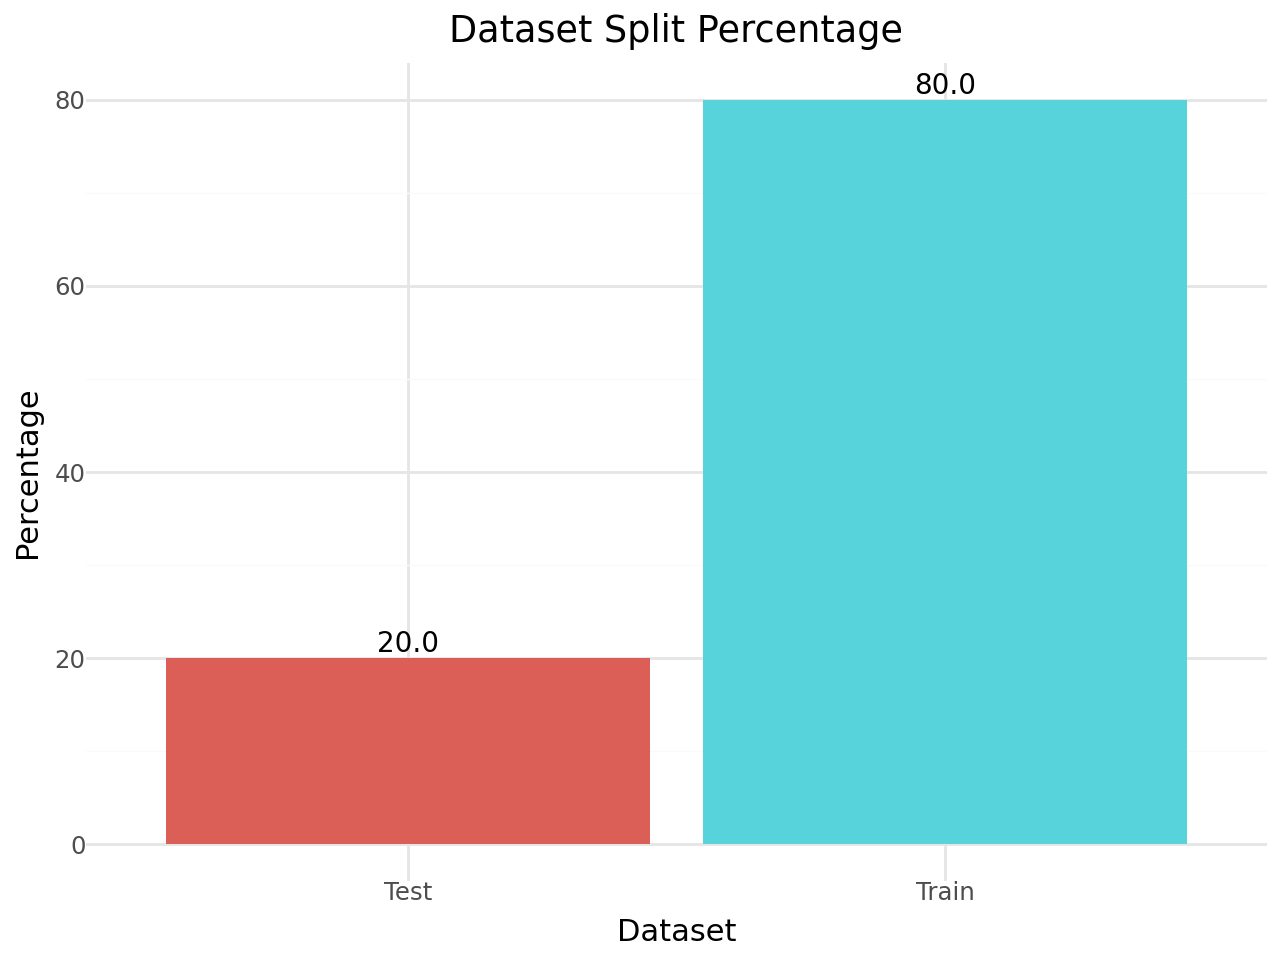

In [ ]:
from plotnine import ggplot, aes, geom_bar, geom_text, labs, theme_minimal
dataset_counts = combined_data['Dataset'].value_counts()
dataset_percentage = (dataset_counts / len(combined_data)) * 100

dataset_summary = pd.DataFrame({
    'Dataset': dataset_percentage.index,
    'Percentage': dataset_percentage.values
})

# Create the plot
(
    ggplot(dataset_summary, aes(x='Dataset', y='Percentage', fill='Dataset')) +
    geom_bar(stat='identity', show_legend=False) +
    geom_text(
        aes(label=round(dataset_summary['Percentage'], 1)),
        va='bottom',
        size=10
    ) +
    labs(
        title="Dataset Split Percentage",
        x="Dataset",
        y="Percentage"
    ) +
    theme_minimal()
)


In [ ]:
# Summary statistics
combined_data.drop(columns=['Unnamed: 0', 'id', 'Dataset']).describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


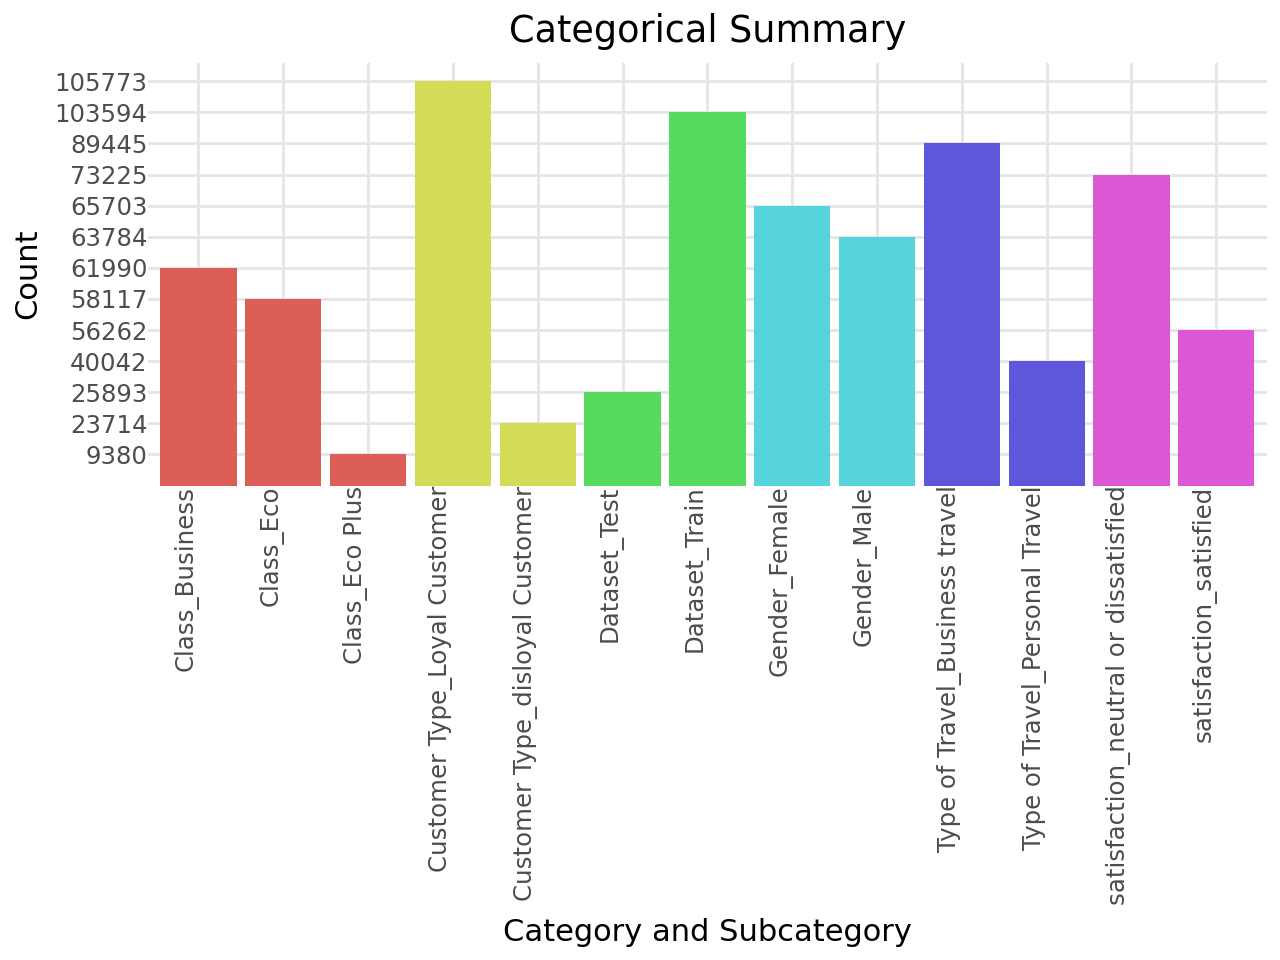

In [ ]:
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_text
import pandas as pd

# Summarize categorical variables
cat_columns = combined_data.select_dtypes(include=['object', 'category']).columns

# Create a DataFrame for plotting
plot_data = pd.DataFrame(columns=["Category", "Subcategory", "Count"])
for col in cat_columns:
    counts = combined_data[col].value_counts().reset_index()
    counts.columns = ["Subcategory", "Count"]
    counts["Category"] = col
    plot_data = pd.concat([plot_data, counts], ignore_index=True)

# Tnsure proper ordering: Group by Category and keep Subcategories together
plot_data["Category_Subcategory"] = plot_data["Category"] + "_" + plot_data["Subcategory"]
plot_data = plot_data.sort_values(by=["Category", "Subcategory"], ascending=True)

(
    ggplot(plot_data, aes(x="Category_Subcategory", y="Count", fill="Category"))
    + geom_bar(stat="identity", show_legend=False)
    + theme_minimal()
    + labs(title="Categorical Summary", x="Category and Subcategory", y="Count")
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)


In [ ]:
#renaming columns
combined_data=combined_data.rename(
    columns = {'Gender': 'gender', 'Age': 'age', 'Cleanliness': 'cleanliness', 'Customer Type':'customer_type','Type of Travel':'type_of_travel','Flight Distance':'flight_distance',
                                      'Inflight wifi service':'inflight_wifi_service','Departure/Arrival time convenient':'departure_arrival_time_convenient','Ease of Online booking':'ease_of_online_booking',
                                      'Gate location':'gate_location','Food and drink':'food_and_drink','Online boarding':'online_boarding',
                                      'Seat comfort':'seat_comfort','Inflight entertainment':'inflight_entertainment','On-board service':'on-board_service',
                                      'Leg room service':'leg_room_service','Baggage handling':'baggage_handling','Checkin service':'checkin_service',
                                      'Inflight service':'inflight_service','Departure Delay in Minutes':'departure_delay_in_minutes','Arrival Delay in Minutes':'arrival_delay_in_minutes'})


train=train.rename(
    columns = {'Gender': 'gender', 'Age': 'age', 'Cleanliness': 'cleanliness', 'Customer Type':'customer_type','Type of Travel':'type_of_travel','Flight Distance':'flight_distance',
                                      'Inflight wifi service':'inflight_wifi_service','Departure/Arrival time convenient':'departure_arrival_time_convenient','Ease of Online booking':'ease_of_online_booking',
                                      'Gate location':'gate_location','Food and drink':'food_and_drink','Online boarding':'online_boarding',
                                      'Seat comfort':'seat_comfort','Inflight entertainment':'inflight_entertainment','On-board service':'on-board_service',
                                      'Leg room service':'leg_room_service','Baggage handling':'baggage_handling','Checkin service':'checkin_service',
                                      'Inflight service':'inflight_service','Departure Delay in Minutes':'departure_delay_in_minutes','Arrival Delay in Minutes':'arrival_delay_in_minutes'})

test=test.rename(
    columns = {'Gender': 'gender', 'Age': 'age', 'Cleanliness': 'cleanliness', 'Customer Type':'customer_type','Type of Travel':'type_of_travel','Flight Distance':'flight_distance',
                                      'Inflight wifi service':'inflight_wifi_service','Departure/Arrival time convenient':'departure_arrival_time_convenient','Ease of Online booking':'ease_of_online_booking',
                                      'Gate location':'gate_location','Food and drink':'food_and_drink','Online boarding':'online_boarding',
                                      'Seat comfort':'seat_comfort','Inflight entertainment':'inflight_entertainment','On-board service':'on-board_service',
                                      'Leg room service':'leg_room_service','Baggage handling':'baggage_handling','Checkin service':'checkin_service',
                                      'Inflight service':'inflight_service','Departure Delay in Minutes':'departure_delay_in_minutes','Arrival Delay in Minutes':'arrival_delay_in_minutes'})

# Adding a binary encoding for relevant dummy variables
import numpy as np
combined_data = combined_data.assign(
    satisfaction_dummy = lambda d: np.where(d.satisfaction == 'satisfied', 1, 0),
    gender_dummy = lambda d: np.where(d.gender == 'Male', 1, 0),
    customer_type_dummy = lambda d: np.where(d.customer_type == 'Loyal Customer', 1, 0),
    type_of_travel_dummy = lambda d: np.where(d.type_of_travel == 'Business travel', 1, 0),
    class_dummy_bus = lambda d: np.where(d.Class == 'Business', 1, 0),
    class_dummy_eco = lambda d: np.where(d.Class == 'Eco', 1, 0)
)



#creating age groups
import numpy as np
combined_data = combined_data.assign(
    age_group=lambda d: np.select(
        [
            (d.age >= 0) & (d.age <= 12),
            (d.age >= 13) & (d.age <= 19),
            (d.age >= 20) & (d.age <= 64),
            (d.age >= 65)
        ],
        ['Child', 'Teen', 'Adult', 'Senior'],
        default='Unknown'
    )
)

In [ ]:
#creating age groups
import numpy as np
combined_data = combined_data.assign(
    age_group=lambda d: np.select(
        [
            (d.age >= 0) & (d.age <= 12),
            (d.age >= 13) & (d.age <= 19),
            (d.age >= 20) & (d.age <= 64),
            (d.age >= 65)
        ],
        ['Child', 'Teen', 'Adult', 'Senior'],
        default='Unknown'
    )
)

In [ ]:
agg_data2=(
    combined_data
        .groupby("age_group")
            .agg(Average_flight_distance = ("flight_distance","mean"),
                 Average_departure_delay_in_minutes=("departure_delay_in_minutes","mean"),
                 Average_arrival_delay_in_minutes=("arrival_delay_in_minutes","mean"))
)
agg_data2 = agg_data2.rename(columns={
    'age_group': 'age group',
    'Average_flight_distance': 'Avg flight distance (miles)',
    'Average_departure_delay_in_minutes': 'Avg Depart. Delay(min)',
    'Average_arrival_delay_in_minutes': 'Avg Arriv. Delay(min)'
})

print(agg_data2)

           Avg flight distance (miles)  Avg Depart. Delay(min)  \
age_group                                                        
Adult                      1230.683534               14.610271   
Child                       905.119262               15.287990   
Senior                      958.301374               14.060677   
Teen                        950.844776               15.198236   

           Avg Arriv. Delay(min)  
age_group                         
Adult                  15.045807  
Child                  15.865437  
Senior                 14.377305  
Teen                   15.852646  


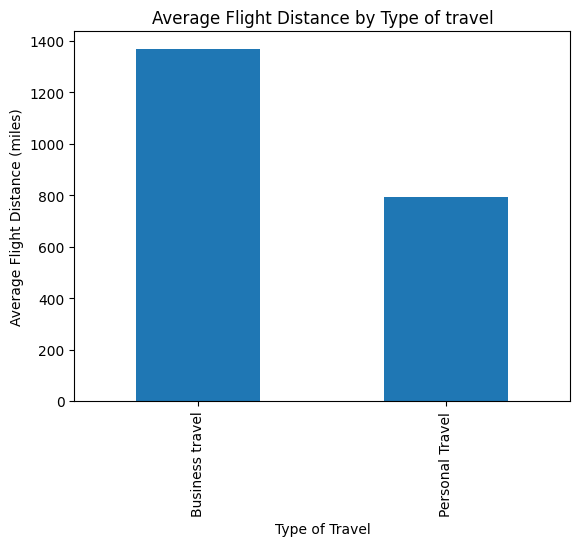

In [ ]:
import matplotlib.pyplot as plt
agg_data1=(
    combined_data
        .groupby("type_of_travel")
            .agg(Average_flight_distance = ("flight_distance","mean"),
                 )
)

# Plotting
agg_data1.plot(kind='bar', y='Average_flight_distance', legend=False)

# Renaming the chart titles and labels
plt.title('Average Flight Distance by Type of travel')  # Title of the chart
plt.xlabel('Type of Travel')  # Label for the x-axis
plt.ylabel('Average Flight Distance (miles)')  # Label for the y-axis

# Display the plot
plt.show()

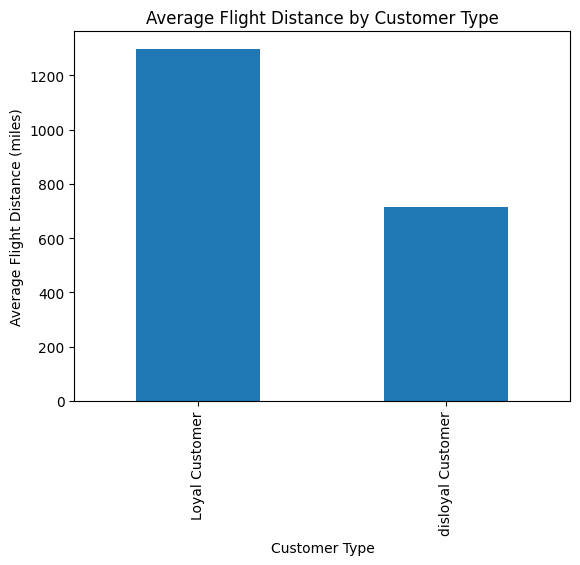

In [ ]:
agg_data = (
    combined_data
        .groupby("customer_type")
            .agg(Average_flight_distance = ("flight_distance","mean"),
                 )
)
import pandas as pd
import matplotlib.pyplot as plt
# Plotting
agg_data.plot(kind='bar', y='Average_flight_distance', legend=False)

# Renaming the chart titles and labels
plt.title('Average Flight Distance by Customer Type')  # Title of the chart
plt.xlabel('Customer Type')  # Label for the x-axis
plt.ylabel('Average Flight Distance (miles)')  # Label for the y-axis

# Display the plot
plt.show()

In [ ]:
(
    combined_data
        .groupby("satisfaction")
            .agg(avg_wifi_rating = ("inflight_wifi_service","mean"),
                 avg_time_convenience_rating=("departure_arrival_time_convenient","mean"),
                 avg_booking_easy_rating=("ease_of_online_booking","mean"),
                 avg_gate_location_rating=("gate_location","mean"),
                 avg_food_drink_rating=("food_and_drink","mean"),
                 avg_online_boarding_rating=("online_boarding","mean"),
                 avg_seat_comfort_rating=("seat_comfort","mean"),
                 avg_inflight_entert_rating=("inflight_entertainment","mean"),
                 avg_onboard_service_rating=("on-board_service","mean"),
                 avg_leg_room_rating=("leg_room_service","mean"),
                 avg_baggage_handling_rating=("baggage_handling","mean"),
                 avg_checkin_rating=("checkin_service","mean"),
                 avg_inflight_service_rating=("inflight_service","mean"),
                 avg_cleanliness_rating=("cleanliness","mean"),
                 )
)

,avg_wifi_rating,avg_time_convenience_rating,avg_booking_easy_rating,avg_gate_location_rating,avg_food_drink_rating,avg_online_boarding_rating,avg_seat_comfort_rating,avg_inflight_entert_rating,avg_onboard_service_rating,avg_leg_room_rating,avg_baggage_handling_rating,avg_checkin_rating,avg_inflight_service_rating,avg_cleanliness_rating
satisfaction,,,,,,,,,,,,,,
neutral or dissatisfied,2.398470,3.130229,2.549512,2.980184,2.958525,2.658846,3.038525,2.892236,3.019570,2.990495,3.374681,3.043045,3.389662,2.932851
satisfied,3.158135,2.962497,3.026554,2.972646,3.525061,4.025648,3.966176,3.964345,3.856475,3.820376,3.966638,3.648786,3.971277,3.746134


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

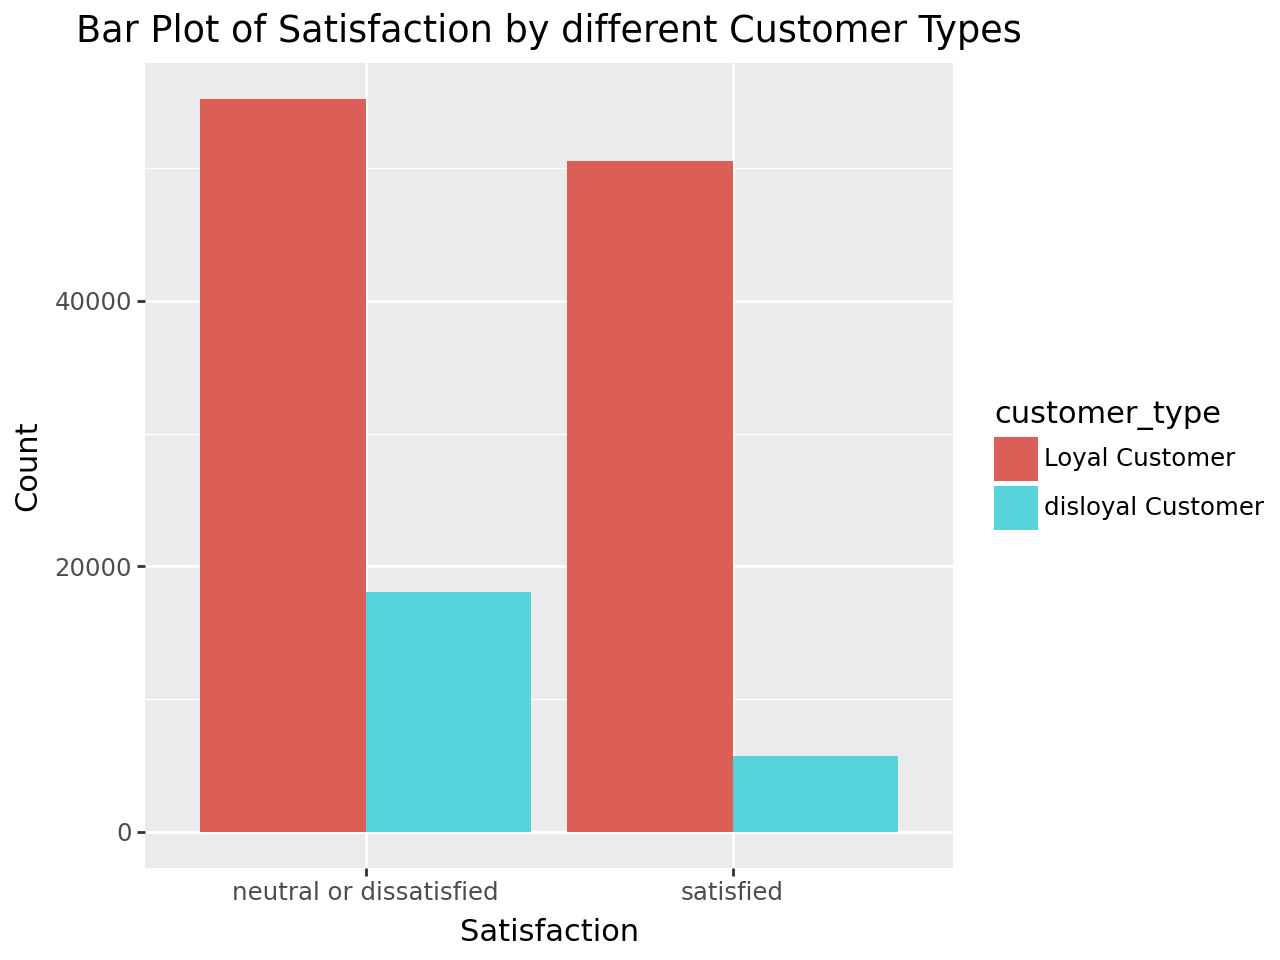

In [ ]:
from plotnine import (
ggplot,
aes,
geom_histogram,
geom_rug,
geom_bar,
coord_flip,
after_stat,
geom_boxplot,
geom_violin,
geom_point,
geom_line,
geom_tile,
facet_wrap,
labs,
scale_fill_continuous,
)
(
ggplot(combined_data, aes(x = 'satisfaction', fill = 'customer_type')) +
  geom_bar(position = 'dodge') +
  labs(y = "Count", x = "Satisfaction",
       title = "Bar Plot of Satisfaction by different Customer Types")
)

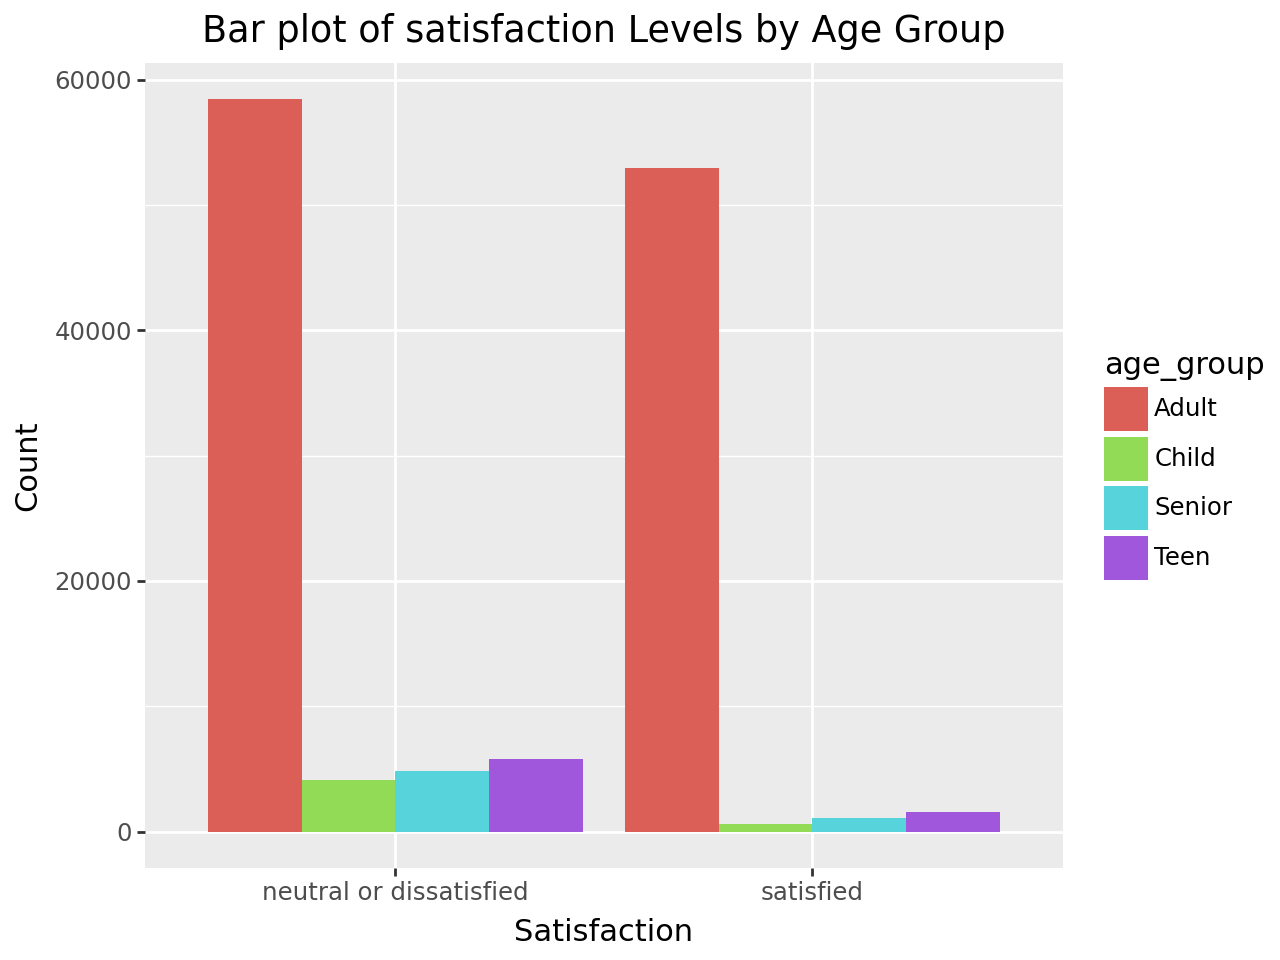

In [ ]:

(
ggplot(combined_data, aes(x = 'satisfaction', fill = 'age_group')) +
  geom_bar(position = 'dodge') +
  labs(y = "Count", x = "Satisfaction",
       title = "Bar plot of satisfaction Levels by Age Group")
)

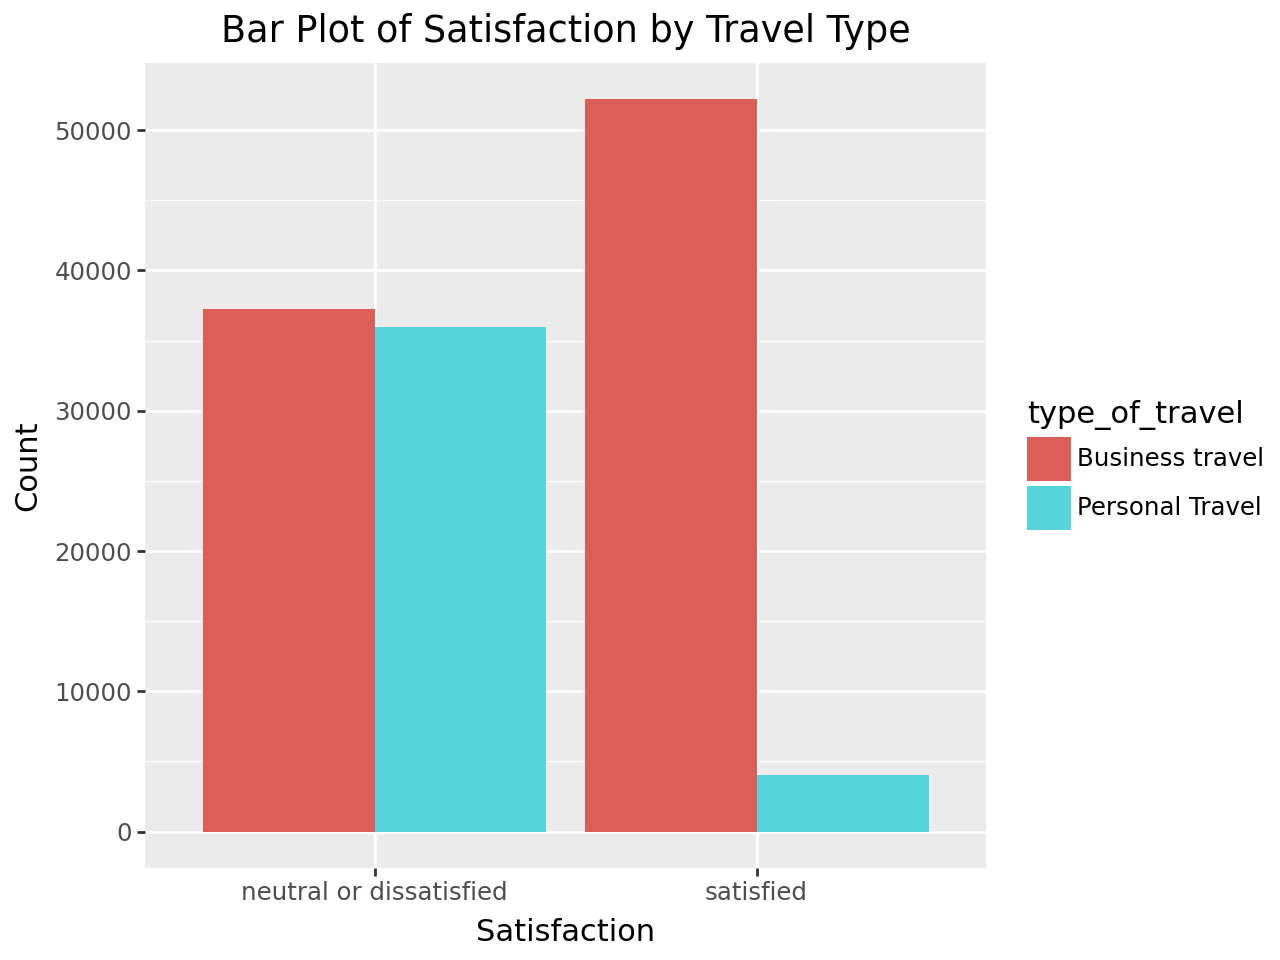

In [ ]:

(
ggplot(combined_data, aes(x = 'satisfaction', fill = 'type_of_travel')) +
  geom_bar(position = 'dodge') +
  labs(y = "Count", x = "Satisfaction",
       title = "Bar Plot of Satisfaction by Travel Type")
)

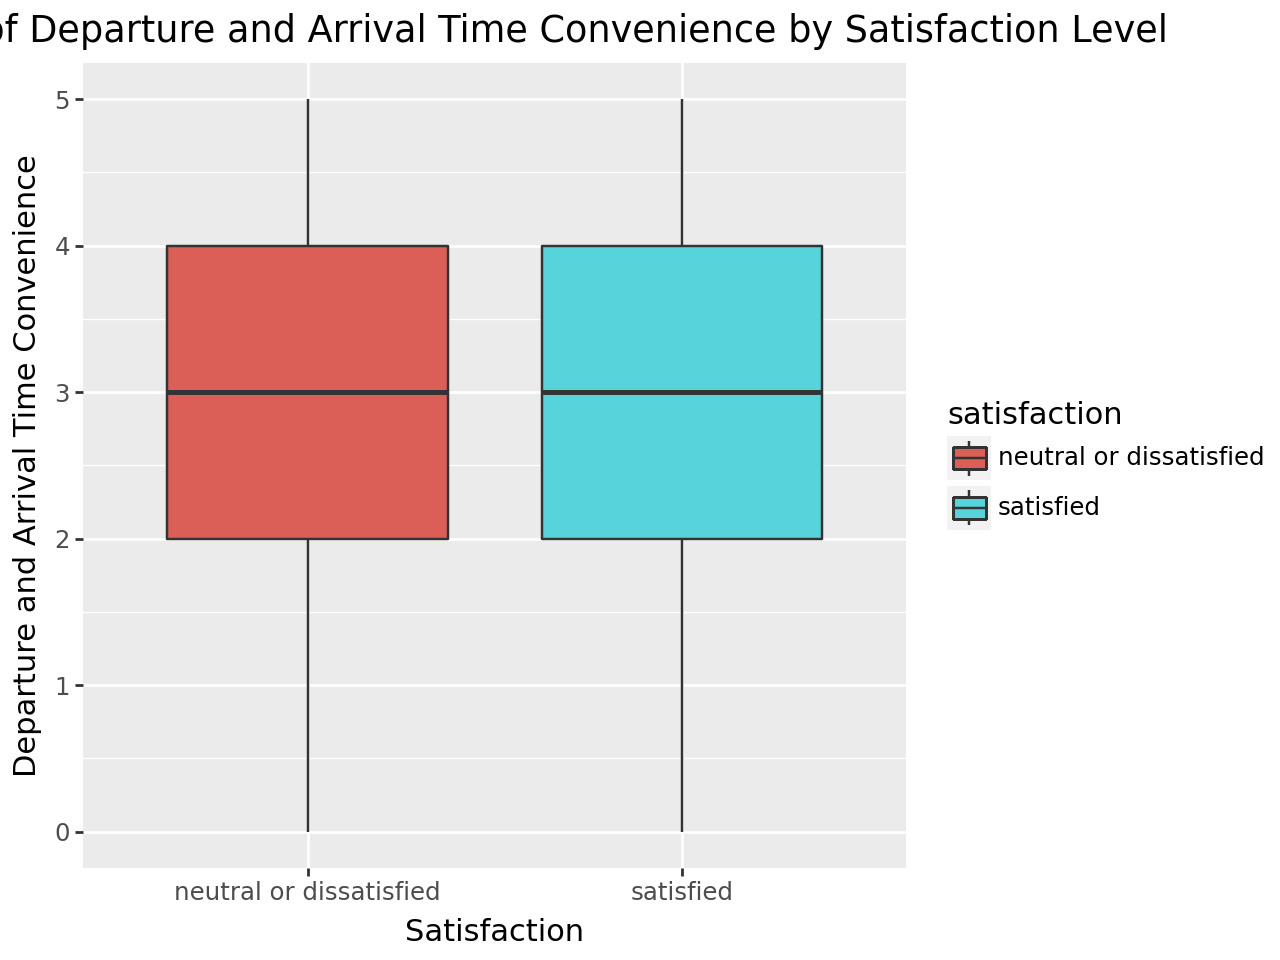

In [ ]:
(
    ggplot(combined_data, aes(x='satisfaction', y='departure_arrival_time_convenient', fill='satisfaction')) +
    geom_boxplot() +
    labs(
        x="Satisfaction",
        y="Departure and Arrival Time Convenience",
        title="Box Plot of Departure and Arrival Time Convenience by Satisfaction Level"
    )
)

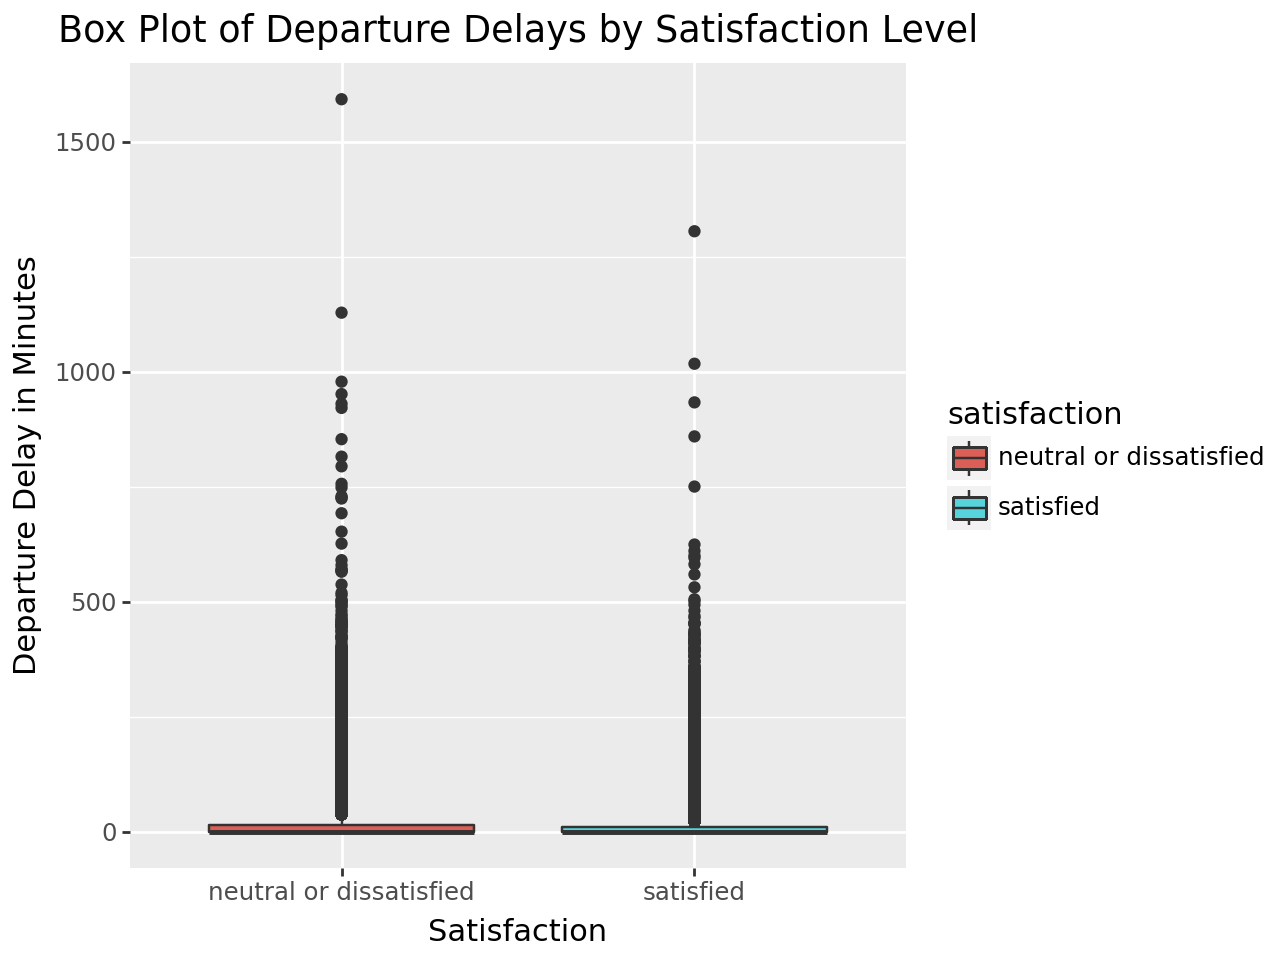

In [ ]:
from plotnine import ggplot, aes, geom_histogram, labs
(
    ggplot(combined_data, aes(x='satisfaction', y='departure_delay_in_minutes', fill='satisfaction')) +
    geom_boxplot() +
    labs(y="Departure Delay in Minutes", x="Satisfaction",
         title="Box Plot of Departure Delays by Satisfaction Level")
)

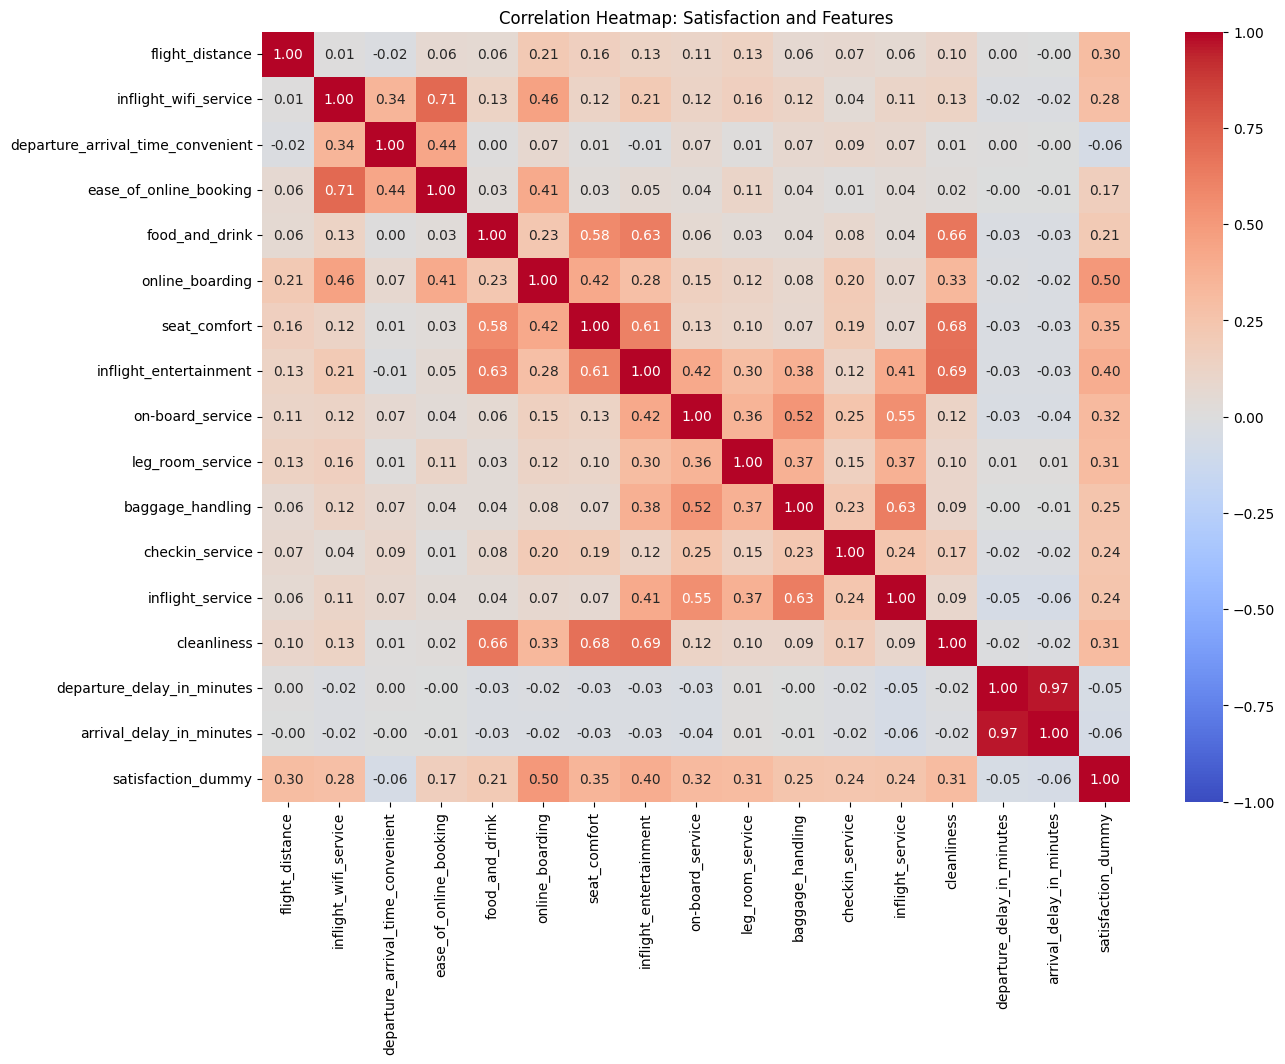

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relevant columns for correlation
correlation_columns = [
    'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient',
    'ease_of_online_booking', 'food_and_drink', 'online_boarding',
    'seat_comfort', 'inflight_entertainment', 'on-board_service',
    'leg_room_service', 'baggage_handling', 'checkin_service',
    'inflight_service', 'cleanliness', 'departure_delay_in_minutes',
    'arrival_delay_in_minutes', 'satisfaction_dummy'
]

# Compute correlation matrix
correlation_matrix = combined_data[correlation_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Satisfaction and Features')
plt.show()


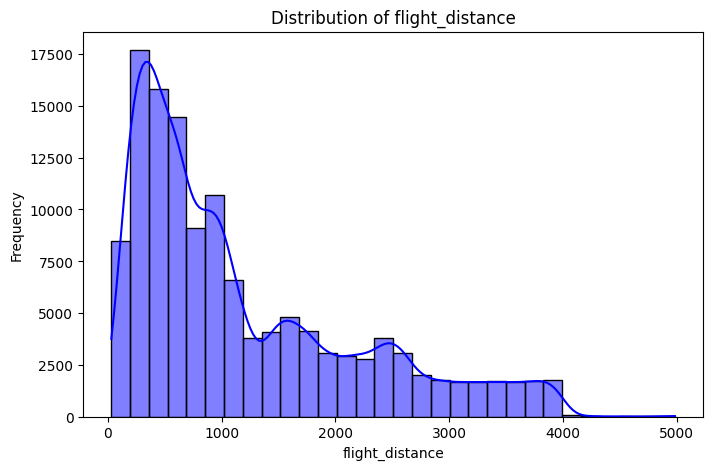

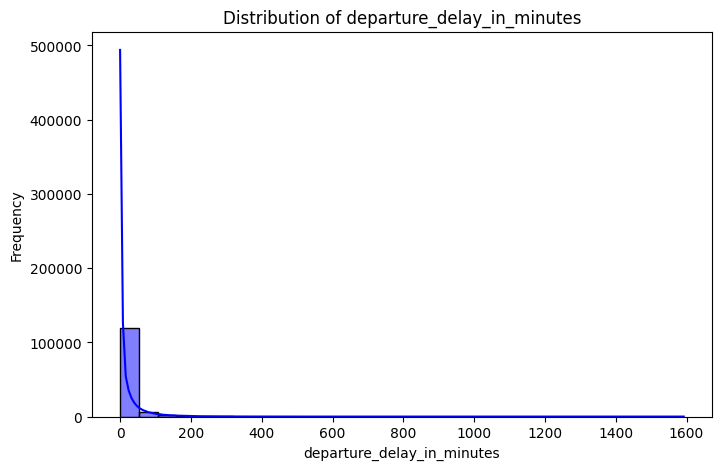

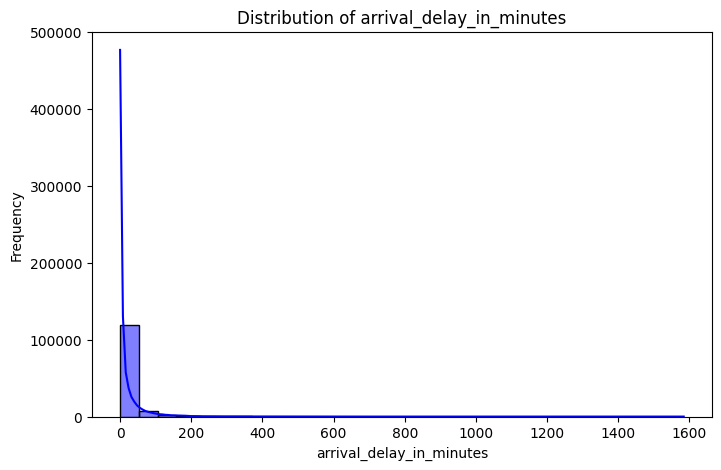

In [ ]:

# Plot histograms for numerical features
for column in ['flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=combined_data, x=column, bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

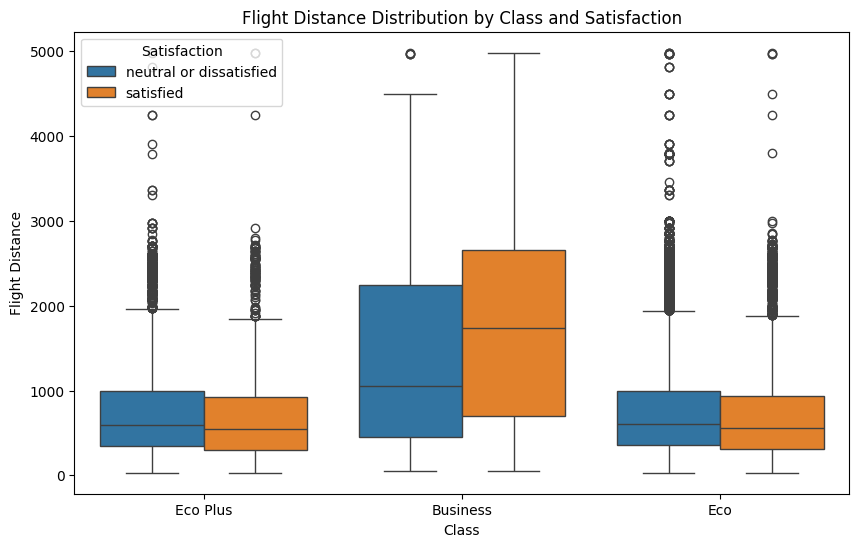

In [ ]:
# Compare satisfaction across travel classes using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Class', y='flight_distance', hue='satisfaction')
plt.title('Flight Distance Distribution by Class and Satisfaction')
plt.xlabel('Class')
plt.ylabel('Flight Distance')
plt.legend(title='Satisfaction')
plt.show()



In [ ]:
#clustering
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from plotnine import (
ggplot,
aes,
geom_point,
geom_line
)

# cols to consider
req_cols = ['flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']

clustering_features = combined_data.loc[:,req_cols]
# sklearn has a scaler
scaler = StandardScaler()
# fit and transform from sklearn does the scaling
scaled_features = scaler.fit_transform(clustering_features)

In [ ]:
#identify the number of clusters
#calculate WSS
def wss_calculation(K, data):
  WSS = []
  for i in range(K):
    cluster = KMeans(n_clusters = i + 1, random_state = 1)
    cluster.fit_predict(data)
    # cluster index
    label = cluster.labels_
    wss = []
    for j in range(i+1):
      # extract each cluster according to its index
      idx = [t for t, e in enumerate(label) if e == j]
      cluster = data[idx,]
      # calculate the WSS:
      cluster_mean = cluster.mean(axis = 0)
      distance = np.sum(np.abs(cluster - cluster_mean)**2,
                                            axis = -1)
      wss.append(sum(distance))
    WSS.append(sum(wss))
  return WSS

In [ ]:
# calculate the within cluster sum of squres
WSS = wss_calculation(10, scaled_features)

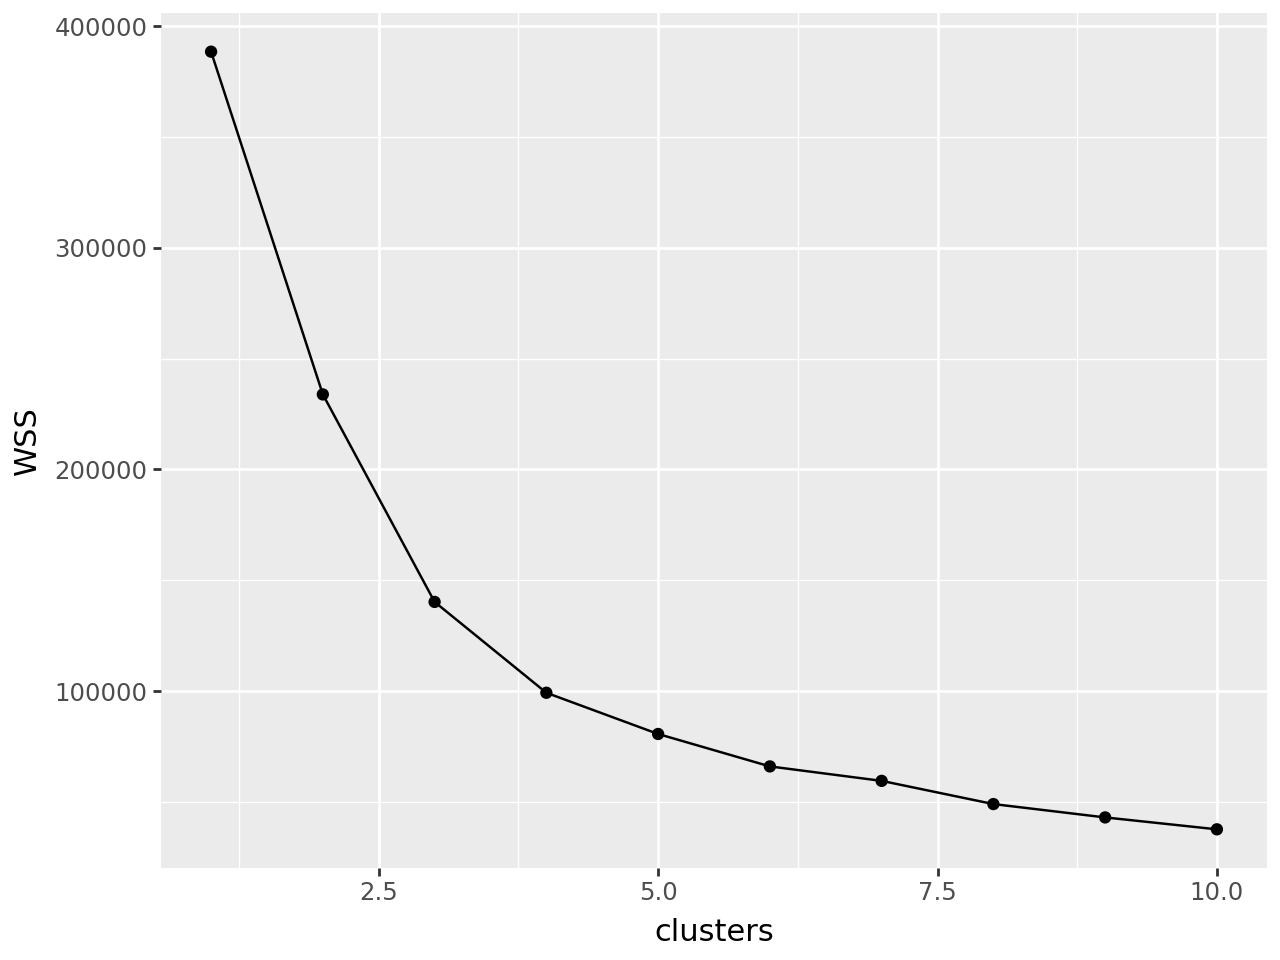

In [ ]:
plot_data = pd.DataFrame({"clusters": range(1,11),
"WSS": WSS})
(
ggplot(plot_data, aes(x = "clusters", y = "WSS"))
+ geom_point()
+ geom_line()
).show()

In [ ]:
#elbow is at 5
kmeans_model = KMeans(n_clusters = 5, random_state = 1)
segment_kmeans = kmeans_model.fit(scaled_features)

combined_data['segment'] = segment_kmeans.labels_
combined_data.head()


,Unnamed: 0,id,gender,customer_type,age,type_of_travel,Class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,...,satisfaction,Dataset,satisfaction_dummy,gender_dummy,customer_type_dummy,type_of_travel_dummy,class_dummy_bus,class_dummy_eco,age_group,segment
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,neutral or dissatisfied,Train,0,1,1,0,0,0,Teen,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,neutral or dissatisfied,Train,0,1,0,1,1,0,Adult,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,satisfied,Train,1,0,1,1,1,0,Adult,0
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,neutral or dissatisfied,Train,0,0,1,1,1,0,Adult,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,satisfied,Train,1,1,1,1,1,0,Adult,0


In [ ]:
combined_data.groupby(["segment"]).agg(
    mean_flight_distance = ('flight_distance','mean'),
    mean_departure_delay_min = ('departure_delay_in_minutes','mean'),
    mean_arrival_delay_min = ('arrival_delay_in_minutes','mean'),
    sum_obs = ('segment','size'))


,mean_flight_distance,mean_departure_delay_min,mean_arrival_delay_min,sum_obs
segment,,,,
0,664.686456,3.924405,4.232887,81778
1,1218.761645,145.565786,148.063470,3671
2,2648.027846,6.150387,6.408165,31818
3,1323.219601,347.301270,350.577132,551
4,882.848659,56.026223,57.189476,11669


In [ ]:
agg_data = combined_data.groupby(['segment', 'satisfaction']).size()


unstacked_data = agg_data.unstack(fill_value=0)
unstacked_data['Total'] = unstacked_data.sum(axis=1)
unstacked_data.loc['Total'] = unstacked_data.sum()

print(unstacked_data)

satisfaction  neutral or dissatisfied  satisfied   Total
segment                                                 
0                               52466      29312   81778
1                                2336       1335    3671
2                               10088      21730   31818
3                                 341        210     551
4                                7994       3675   11669
Total                           73225      56262  129487


In [ ]:
req_columns = ['flight_distance', 'age','satisfaction_dummy','gender_dummy','customer_type_dummy']
descriptors = combined_data.loc[:,req_columns]
segment = combined_data['segment']

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(descriptors, segment)
predicted_segment = lda.predict(descriptors)
lda_segmentation = (
    combined_data
        .assign(predicted_segment = predicted_segment)
)
# display only the segment and predicted_segment columns
lda_segmentation.loc[:,["segment","predicted_segment"]]


,segment,predicted_segment
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
129482,0,0
129483,0,0
129484,0,0
129485,0,0


In [ ]:
accuracy = accuracy_score(segment, predicted_segment)
print(f'Accuracy of LDA model on the same dataset: {accuracy * 100:.2f}%')

Accuracy of LDA model on the same dataset: 85.52%


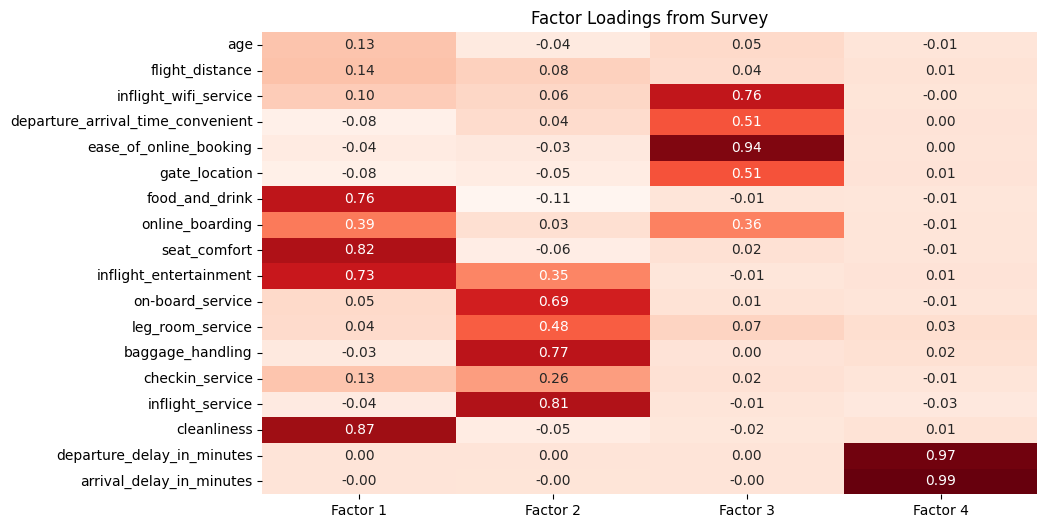

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import pandas as pd

combined_data = combined_data.drop(columns=["satisfaction_dummy", "id", "Unnamed: 0", 'gender_dummy',
       'customer_type_dummy', 'type_of_travel_dummy', 'class_dummy_bus',
       'class_dummy_eco', 'age_group'], errors="ignore")
df_clean = combined_data.select_dtypes(include=[float, int]).dropna()

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


# Conducting Factor Analysis with oblimin rotation
fa_oblimin = FactorAnalyzer(n_factors=4, rotation="oblimin")
fa_oblimin.fit(df_scaled)
factor_loadings = fa_oblimin.loadings_


# Create a heatmap for the factor loadings
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings, annot=True, cmap="Reds", cbar=False, fmt='.2f',
            xticklabels=[f"Factor {i+1}" for i in range(factor_loadings.shape[1])],
            yticklabels=df_clean.columns)
plt.title("Factor Loadings from Survey")
plt.show()


In [ ]:
# Generate factor scores and add them to the dataset.
factor_scores = fa_oblimin.transform(df_scaled)

factor_scores_df = pd.DataFrame(factor_scores,
                                columns=[f"Factor{i+1}" for i in range(factor_scores.shape[1])])
combined_data = pd.concat([combined_data.reset_index(drop=True), factor_scores_df], axis=1)


In [ ]:
import numpy as np
combined_data = combined_data.assign(
    satisfaction_dummy = lambda d: np.where(d.satisfaction == 'satisfied', 1, 0),
    gender_dummy = lambda d: np.where(d.gender == 'Male', 1, 0),
    customer_type_dummy = lambda d: np.where(d.customer_type == 'Loyal Customer', 1, 0),
    type_of_travel_dummy = lambda d: np.where(d.type_of_travel == 'Business travel', 1, 0),
    class_dummy_bus = lambda d: np.where(d.Class == 'Business', 1, 0),
    class_dummy_eco = lambda d: np.where(d.Class == 'Eco', 1, 0)
)

In [ ]:
from statsmodels.formula.api import logit
fmla = "satisfaction_dummy ~ age + gender_dummy + flight_distance + customer_type_dummy + type_of_travel_dummy + class_dummy_bus + class_dummy_eco + Factor1 + Factor2 + Factor3 + Factor4"
lregression_model = logit(formula=fmla,
                          data=combined_data).fit()
print(lregression_model.summary())

Optimization terminated successfully.
         Current function value: 0.380066
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     satisfaction_dummy   No. Observations:               129487
Model:                          Logit   Df Residuals:                   129475
Method:                           MLE   Df Model:                           11
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                  0.4448
Time:                        03:19:31   Log-Likelihood:                -49214.
converged:                       True   LL-Null:                       -88639.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.3494      0.045    -95.945      0.000      -4.438      -4.261

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare the features used in the logistic regression
features = ["age", "gender_dummy", "flight_distance", "customer_type_dummy",
            "type_of_travel_dummy", "class_dummy_bus", "class_dummy_eco",
            "Factor1", "Factor2", "Factor3", "Factor4"]

# Subset the data to include only the independent variables
X = combined_data[features]

# Add constant to the features matrix (intercept term for VIF calculation)
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
vif_data


,feature,VIF
0,const,31.195984
1,age,1.123429
2,gender_dummy,1.002866
3,flight_distance,1.361967
4,customer_type_dummy,1.478068
5,type_of_travel_dummy,1.868098
6,class_dummy_bus,4.682230
7,class_dummy_eco,4.047640
8,Factor1,1.165726
9,Factor2,1.153027


In [ ]:
fmla = "satisfaction_dummy ~ age * Factor1 + age * Factor2 + age * Factor3 + age * Factor4 + \
        gender_dummy * Factor1 + gender_dummy * Factor2 + gender_dummy * Factor3 + gender_dummy * Factor4 + \
        class_dummy_bus * Factor1 + class_dummy_bus * Factor2 + class_dummy_bus * Factor3 + class_dummy_bus * Factor4 + \
        class_dummy_eco * Factor1 + class_dummy_eco * Factor2 + class_dummy_eco * Factor3 + class_dummy_eco * Factor4 + \
        flight_distance * Factor1 + flight_distance * Factor2 + flight_distance * Factor3 + flight_distance * Factor4 + \
        customer_type_dummy * Factor1 + customer_type_dummy * Factor2 + customer_type_dummy * Factor3 + customer_type_dummy * Factor4 + \
        type_of_travel_dummy * Factor1 + type_of_travel_dummy * Factor2 + type_of_travel_dummy * Factor3 + type_of_travel_dummy * Factor4"

lregression_model = logit(formula=fmla, data=combined_data).fit()
print(lregression_model.summary())


Optimization terminated successfully.
         Current function value: 0.309586
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     satisfaction_dummy   No. Observations:               129487
Model:                          Logit   Df Residuals:                   129451
Method:                           MLE   Df Model:                           35
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.5477
Time:                        03:51:28   Log-Likelihood:                -40087.
converged:                       True   LL-Null:                       -88639.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.6218      0.055    -84.248      0.000

In [ ]:
# Target and features declaration for training and testing datasets
train = train.assign(
    satisfaction_dummy = lambda d: np.where(d.satisfaction == 'satisfied', 1, 0))
test = test.assign(
    satisfaction_dummy = lambda d: np.where(d.satisfaction == 'satisfied', 1, 0))

target_train = train['satisfaction_dummy']
features_train = train.loc[:,
    ['gender', 'customer_type', 'age', 'type_of_travel', 'Class',
     'flight_distance', 'inflight_wifi_service',
     'departure_arrival_time_convenient', 'ease_of_online_booking',
     'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
     'inflight_entertainment', 'on-board_service', 'leg_room_service',
     'baggage_handling', 'checkin_service', 'inflight_service',
     'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
]

target_test = test['satisfaction_dummy']
features_test = test[
    ['gender', 'customer_type', 'age', 'type_of_travel', 'Class',
     'flight_distance', 'inflight_wifi_service',
     'departure_arrival_time_convenient', 'ease_of_online_booking',
     'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
     'inflight_entertainment', 'on-board_service', 'leg_room_service',
     'baggage_handling', 'checkin_service', 'inflight_service',
     'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
]

# Define categorical and numerical features for preprocessing
cat_feats = ['gender', 'customer_type', 'type_of_travel', 'Class', 'inflight_wifi_service',
    'departure_arrival_time_convenient', 'ease_of_online_booking',
    'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
    'inflight_entertainment', 'on-board_service', 'leg_room_service',
    'baggage_handling', 'checkin_service', 'inflight_service',
    'cleanliness',]
num_feats = [
    'age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes'
]

# Preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

final_pipe = ColumnTransformer([
    ('cat', encoder, cat_feats),
    ('num', scaler, num_feats)
])

# Preprocess training and testing datasets
features_train_processed = final_pipe.fit_transform(features_train)
features_test_processed = final_pipe.transform(features_test)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(features_train_processed, target_train)

# Predictions on the test dataset
predictions = logistic_model.predict(features_test_processed)

# Dataframe of actual vs predicted satisfaction
result_df = pd.DataFrame({
    'actual_satisfaction': list(target_test),
    'predicted_satisfaction': list(predictions)
})
print(result_df.head())


# Evaluate the model
accuracy = accuracy_score(target_test, predictions)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
f1 = f1_score(target_test, predictions)
print(f"Logistic Regression F1 score: {f1:.4f}")

confusion = confusion_matrix(target_test, predictions)
print("\nConfusion Matrix for Logistic Regression:")
print(pd.DataFrame(
    confusion,
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]
))


   actual_satisfaction  predicted_satisfaction
0                    1                       1
1                    1                       1
2                    0                       0
3                    1                       1
4                    1                       0
Logistic Regression Accuracy: 0.9325
Logistic Regression F1 score: 0.9223

Confusion Matrix for Logistic Regression:
                 Predicted Negative  Predicted Positive
Actual Negative               13768                 760
Actual Positive                 989               10376


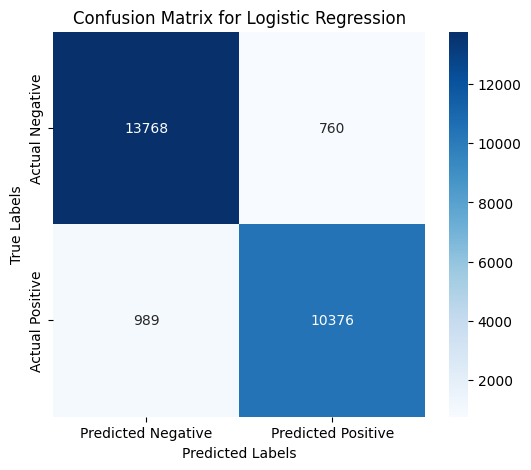

In [ ]:
# Plotting the heatmap for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(features_train_processed, target_train)
rf_predictions = rf_model.predict(features_test_processed)

# Dataframe of actual vs predicted satisfaction
result_df = pd.DataFrame({
    'actual_satisfaction': list(target_test),
    'predicted_satisfaction': list(rf_predictions)
})
print(result_df.head())

# Evaluate the model
rf_accuracy = accuracy_score(target_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
f1 = f1_score(target_test, predictions)
print(f"Random Forest Regression F1 score: {f1:.4f}")

# Confusion matrix
rf_confusion = confusion_matrix(target_test, rf_predictions)
print("\nConfusion Matrix for Random Forest:")
print(pd.DataFrame(
    rf_confusion,
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]
))


   actual_satisfaction  predicted_satisfaction
0                    1                       1
1                    1                       1
2                    0                       0
3                    1                       1
4                    1                       0
Random Forest Accuracy: 0.9443
Random Forest Regression F1 score: 0.9223

Confusion Matrix for Random Forest:
                 Predicted Negative  Predicted Positive
Actual Negative               13937                 591
Actual Positive                 851               10514


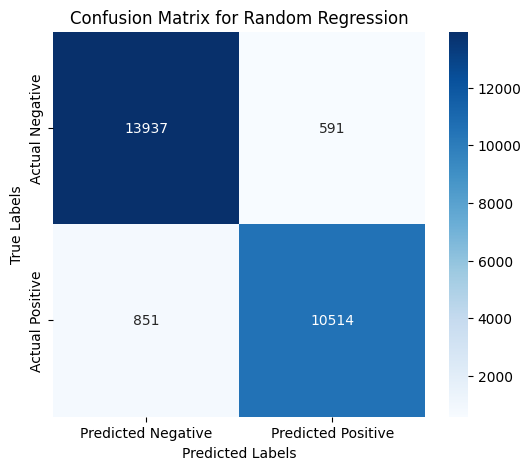

In [ ]:
# Plotting the heatmap for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title('Confusion Matrix for Random Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

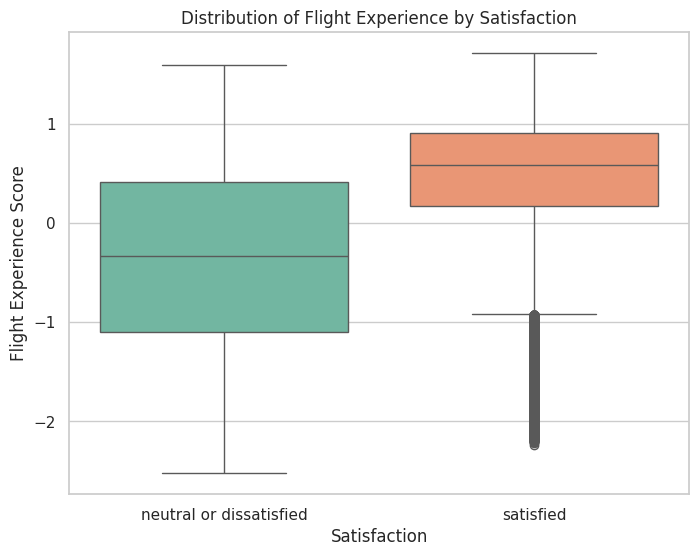

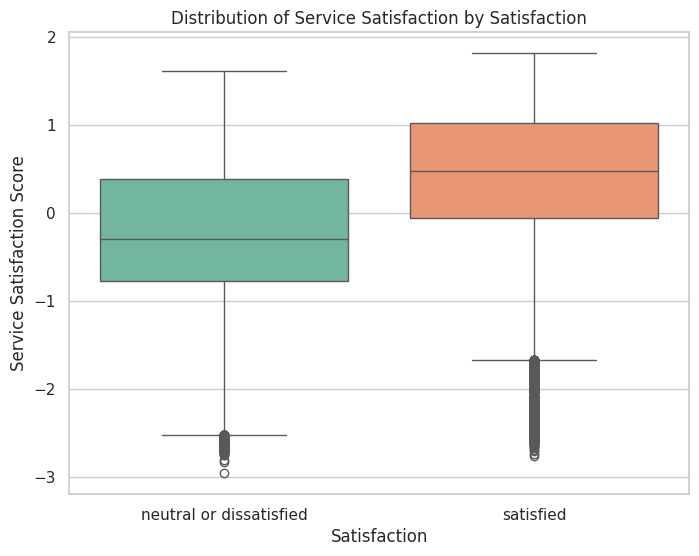

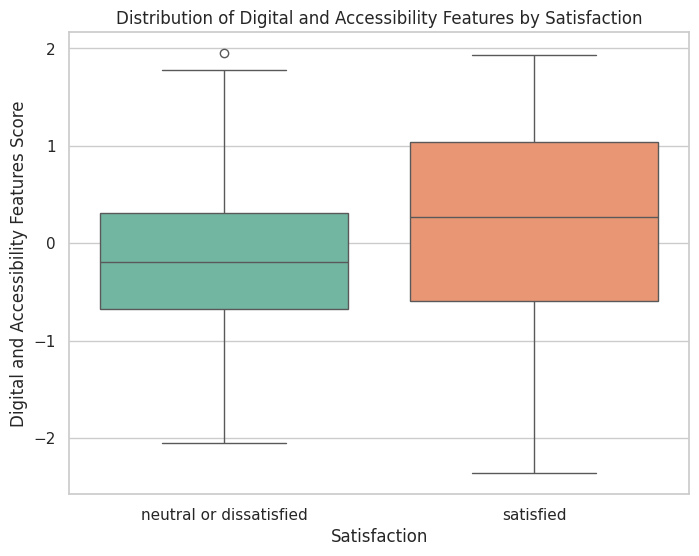

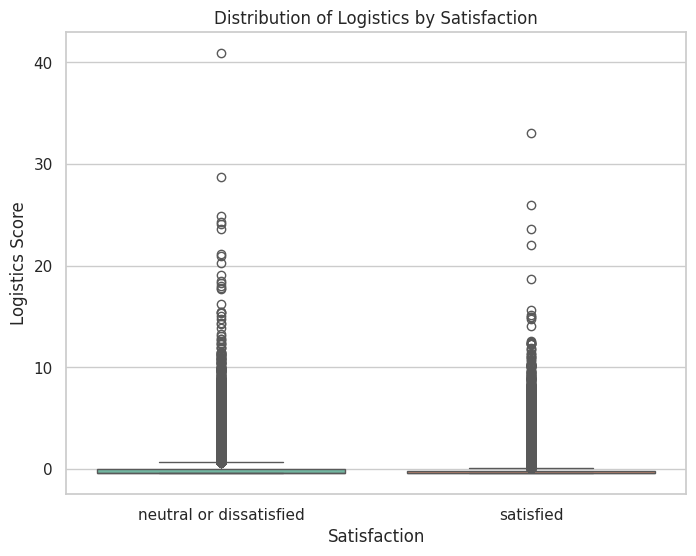

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

renamed_factors = {
    'Factor1': 'Flight Experience',
    'Factor2': 'Service Satisfaction',
    'Factor3': 'Digital and Accessibility Features',
    'Factor4': 'Logistics'
}

for factor, label in renamed_factors.items():
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_data, x='satisfaction', y=factor, hue='satisfaction', palette='Set2')
    plt.title(f'Distribution of {label} by Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(f'{label} Score')
    plt.show()


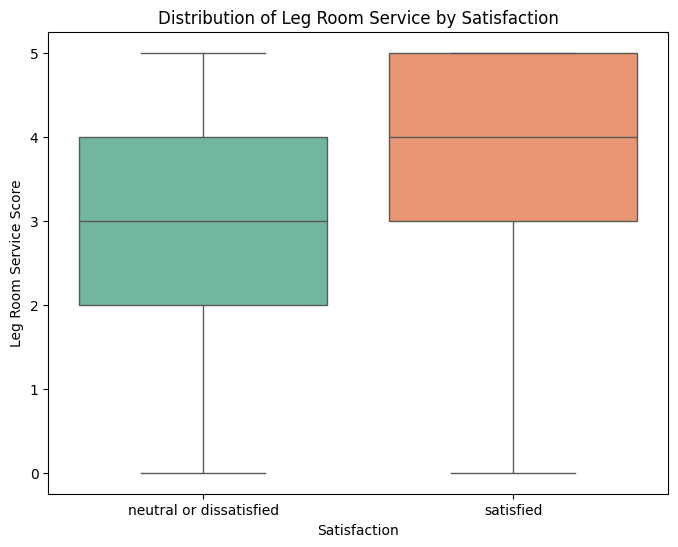

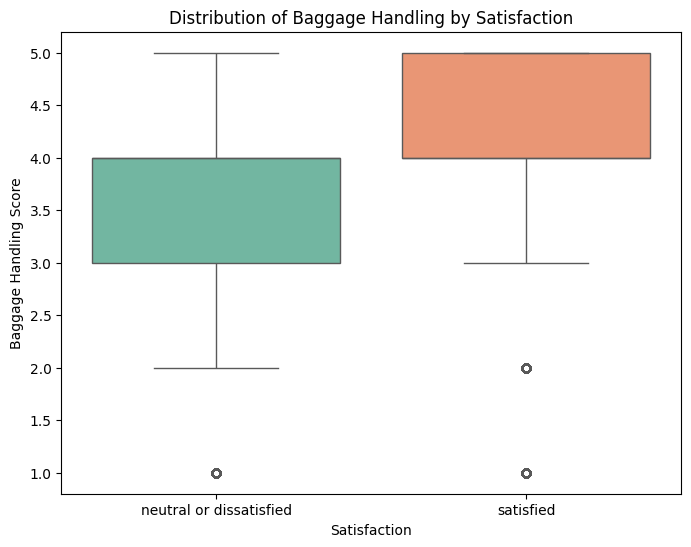

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated factors to focus on 'leg_room_service' and 'baggage_handling'
features = {
    'leg_room_service': 'Leg Room Service',
    'baggage_handling': 'Baggage Handling'
}

for feature, label in features.items():
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_data, x='satisfaction', y=feature, hue='satisfaction', palette='Set2')
    plt.title(f'Distribution of {label} by Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(f'{label} Score')
    plt.show()